# Chat-bot made with long short-term memory (LSTM) and DNNs

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization, LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np

In [2]:
with open("dataset.json") as file:
    dataset = json.load(file)

In [3]:
len(dataset['intents'])

22

In [4]:
dataset['intents'][0]

{'intent': 'Greeting',
 'text': ['Hi',
  'Hi there',
  'Hola',
  'Hello',
  'Hello there',
  'Hya',
  'Hya there'],
 'responses': ['Hi human, please tell me your name',
  'Hello human, please tell me your name',
  'Hola human, please tell me your name'],
 'extension': {'function': '', 'entities': False, 'responses': []},
 'context': {'in': '', 'out': 'GreetingUserRequest', 'clear': False},
 'entityType': 'NA',
 'entities': []}

In [5]:
d = dataset['intents'][0]
l = []
for i in d["text"]:
    row = [i, d["intent"]]
    l.append(row)
GreetingsData = pd.DataFrame(l)
GreetingsData.columns = ["Text", "category"] 
GreetingsData
    

,Text,category
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
5,Hya,Greeting
6,Hya there,Greeting


In [6]:
data = []
for i in range(len(dataset['intents'])):
    d = dataset['intents'][i]
    for j in d["text"]:
        row = [j, d["intent"]]
        l.append(row)
DataSet = pd.DataFrame(l)
DataSet.columns = ["Text", "category"] 

In [7]:
DataSet.shape

(154, 2)

In [8]:
DataSet.category.value_counts

<bound method IndexOpsMixin.value_counts of 0       Greeting
1       Greeting
2       Greeting
3       Greeting
4       Greeting
         ...    
149    SelfAware
150    SelfAware
151    SelfAware
152    SelfAware
153    SelfAware
Name: category, Length: 154, dtype: object>

In [9]:
categories = pd.get_dummies(DataSet["category"], columns=[1], prefix='', prefix_sep='')
DataSet[categories.columns] = categories
DataSet.head()

,Text,category,Clever,CourtesyGoodBye,CourtesyGreeting,CourtesyGreetingResponse,CurrentHumanQuery,GoodBye,Gossip,Greeting,...,PodBayDoor,PodBayDoorResponse,RealNameQuery,SelfAware,Shutup,Swearing,Thanks,TimeQuery,UnderstandQuery,WhoAmI
0,Hi,Greeting,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Hi there,Greeting,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hola,Greeting,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hello,Greeting,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Hello there,Greeting,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
DataSet = DataSet.drop(columns="category")
DataSet.head()

,Text,Clever,CourtesyGoodBye,CourtesyGreeting,CourtesyGreetingResponse,CurrentHumanQuery,GoodBye,Gossip,Greeting,GreetingResponse,...,PodBayDoor,PodBayDoorResponse,RealNameQuery,SelfAware,Shutup,Swearing,Thanks,TimeQuery,UnderstandQuery,WhoAmI
0,Hi,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Hi there,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Hola,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Hello,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Hello there,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = DataSet['Text']
y = DataSet[DataSet.columns[1:]]

In [12]:
MAX_WORDS = 2000

In [13]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=100,
                               output_mode='int')

2022-05-19 18:34:21.626403: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-19 18:34:21.626540: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-19 18:34:21.626645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chiheb-HP): /proc/driver/nvidia/version does not exist
2022-05-19 18:34:21.644233: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
vectorizer.adapt(X.values)

In [15]:
vectorized_text_test = vectorizer(["Hello there"])
vectorized_text_test

<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[35, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])>

In [16]:
vectorized_text = vectorizer(X.values)

In [17]:
TextData = tf.data.Dataset.from_tensor_slices((vectorized_text, y))

In [18]:
TextData = TextData.cache()
TextData = TextData.shuffle(160)
TextData = TextData.batch(24)
TextData = TextData.prefetch(12)

In [19]:
train = TextData.take(int(len(TextData)*.8))
val = TextData.skip(int(len(TextData)*.2)).take(int(len(TextData)*.2))

In [20]:
model = Sequential([
    Embedding(MAX_WORDS+1, 16),
    Bidirectional(LSTM(16, activation='tanh')),
    Dense(25, activation='relu'),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(len(y.columns), activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          32016     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 25)                825       
                                                                 
 dense_1 (Dense)             (None, 50)                1300      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 22)                572       
                                                        

In [21]:
history = model.fit(train, epochs=100, validation_data=val)

Epoch 1/100
5/5 [==============================] - 5s 229ms/step - loss: 3.0918 - val_loss: 3.0893
Epoch 2/100
5/5 [==============================] - 0s 45ms/step - loss: 3.0893 - val_loss: 3.0887
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 3.0881 - val_loss: 3.0862
Epoch 4/100
5/5 [==============================] - 0s 40ms/step - loss: 3.0846 - val_loss: 3.0846
Epoch 5/100
5/5 [==============================] - 0s 42ms/step - loss: 3.0804 - val_loss: 3.0716
Epoch 6/100
5/5 [==============================] - 0s 47ms/step - loss: 3.0758 - val_loss: 3.0930
Epoch 7/100
5/5 [==============================] - 0s 41ms/step - loss: 3.0745 - val_loss: 3.0679
Epoch 8/100
5/5 [==============================] - 0s 45ms/step - loss: 3.0692 - val_loss: 3.0713
Epoch 9/100
5/5 [==============================] - 0s 43ms/step - loss: 3.0537 - val_loss: 3.0455
Epoch 10/100
5/5 [==============================] - 0s 44ms/step - loss: 3.0445 - val_loss: 3.0379
Epoch 11/100
5/5 [

Epoch 84/100
5/5 [==============================] - 0s 42ms/step - loss: 0.3804 - val_loss: 0.2216
Epoch 85/100
5/5 [==============================] - 0s 39ms/step - loss: 0.4048 - val_loss: 0.4140
Epoch 86/100
5/5 [==============================] - 0s 39ms/step - loss: 0.3381 - val_loss: 0.2420
Epoch 87/100
5/5 [==============================] - 0s 42ms/step - loss: 0.3453 - val_loss: 0.5423
Epoch 88/100
5/5 [==============================] - 0s 43ms/step - loss: 0.3864 - val_loss: 0.5036
Epoch 89/100
5/5 [==============================] - 0s 42ms/step - loss: 0.3704 - val_loss: 0.2170
Epoch 90/100
5/5 [==============================] - 0s 41ms/step - loss: 0.3609 - val_loss: 0.2896
Epoch 91/100
5/5 [==============================] - 0s 40ms/step - loss: 0.3754 - val_loss: 0.4488
Epoch 92/100
5/5 [==============================] - 0s 39ms/step - loss: 0.3791 - val_loss: 0.2781
Epoch 93/100
5/5 [==============================] - 0s 40ms/step - loss: 0.3416 - val_loss: 0.2485
Epoch 94/1

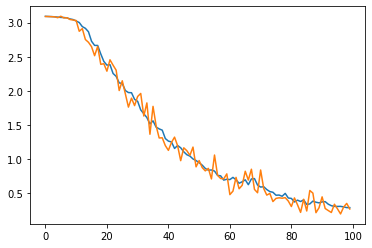

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [23]:
y.columns

Index(['Clever', 'CourtesyGoodBye', 'CourtesyGreeting',
       'CourtesyGreetingResponse', 'CurrentHumanQuery', 'GoodBye', 'Gossip',
       'Greeting', 'GreetingResponse', 'Jokes', 'NameQuery', 'NotTalking2U',
       'PodBayDoor', 'PodBayDoorResponse', 'RealNameQuery', 'SelfAware',
       'Shutup', 'Swearing', 'Thanks', 'TimeQuery', 'UnderstandQuery',
       'WhoAmI'],
      dtype='object')

In [24]:
input_text = vectorizer('my name is chiheb')
input_text

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([32,  8,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])>

In [25]:
res = model.predict(np.expand_dims(input_text, 0))
y.columns[np.array(tf.argmax(res, 1))][0]

'GreetingResponse'

In [ ]:
model.save("model.h5")
model.save("modelPB")

In [ ]:
import random

def chat():
    print("start:\n")
    while True:
        inputText = input("You: ")
        if inputText.lower()=="quit": break
        inputText = vectorizer(inputText)
        res = model.predict(np.expand_dims(inputText, 0))
        categorie = y.columns[np.array(tf.argmax(res, 1))][0]
        for intent in dataset['intents']:
            if intent["intent"] == categorie:
                responses = intent["responses"]
        print("bot: "+random.choice(responses))
chat()

This project is not yet complete, i will revisit it sometime in the near future, the NN model is working but there is some work that could be done to improve it(e.g: add relation between the bot's response and his next responses).